In [1]:
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib
import numpy
import xarray

In [2]:
M4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/longmean_*.nc', decode_times=False)
# M8 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/longmean_*.nc', decode_times=False)
# M16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/longmean_*.nc', decode_times=False)
M32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/longmean_*.nc', decode_times=False)

In [3]:
# Select data and cleanup
uh4 = M4.uh.isel(xq=0).drop('xq')
# uh8 = M8.uh.isel(xq=0).drop('xq')
# uh16 = M16.uh.isel(xq=0).drop('xq')
uh32 = M32.uh.isel(xq=0).drop('xq')

In [4]:
%time UH4 = uh4.isel(time=slice(-10,-1)).mean(dim='time').compute()
# %time UH8 = uh8.isel(time=slice(-10,-1)).mean(dim='time').compute()
# %time UH16 = uh16.isel(time=slice(-10,-1)).mean(dim='time').compute()
%time UH32 = uh32.isel(time=slice(-10,-1)).mean(dim='time').compute()

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 18.9 ms, sys: 31.4 ms, total: 50.3 ms
Wall time: 744 ms
CPU times: user 130 ms, sys: 917 ms, total: 1.05 s
Wall time: 11.7 s


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


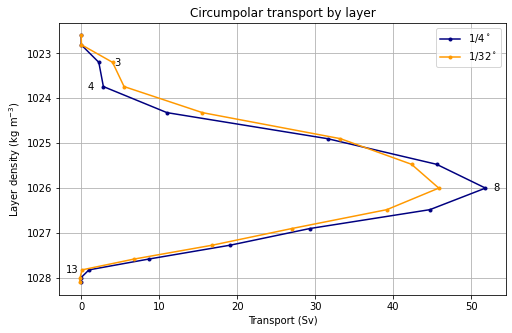

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
cyc = cycler(color=[[0,0,0.5], [1,.6,0], 'c', 'm'])
ax.set_prop_cycle( cyc )
(UH4.sum(dim=('yh'))/1e6).plot(y='zl', yincrease=False, marker='.', label='1/4$^\circ$')
# (UH8.sum(dim=('yh'))/1e6).plot(y='zl', yincrease=False, label='1/8$^\circ$')
# (UH16.sum(dim=('yh'))/1e6).plot(y='zl', yincrease=False, label='1/16$^\circ$')
(UH32.sum(dim=('yh'))/1e6).plot(y='zl', yincrease=False, marker='.', label='1/32$^\circ$')
plt.xlabel('Transport (Sv)'); plt.ylabel('Layer density (kg m$^{-3}$)'); plt.legend(); plt.grid(); plt.title('Circumpolar transport by layer');
xoff = {2:2,3:-2,7:1,12:-3}
for k,x in xoff.items():
    plt.text( (UH4.sum(dim=('yh'))/1e6)[k]+x, UH4.zl[k], '%i'%(k+1), verticalalignment='center')

In [6]:
e32 = M32.e.isel(xh=0,time=slice(-10,-1)).mean(dim='time').compute()

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [7]:
# mh32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/averages_00001*.nc', decode_times=False)
# h32 = mh32.h.isel(xh=0).mean(dim='time').compute()
# # # mh32.time_bnds.values
H32 = M32.h.isel(xh=0,time=slice(-10,-1)).mean(dim='time').compute()

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [8]:
# for k in range( h32.shape[0],0,-1 ):
#     print(k, end=' ')
#     e32[k-1,:] = e32[k,:] + h32[k-1,:]

In [9]:
# m4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/longmean_00030250.nc', decode_times=False)
# m4.time_bnds.values

In [10]:
e4 = M4.e.isel(xh=0,time=slice(-10,-1)).mean(dim='time').compute()

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


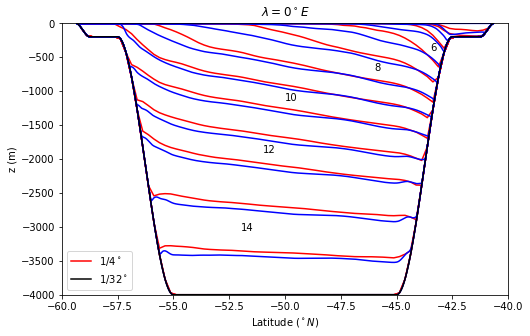

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
xoff = {5:-43.5,7:-46,9:-50,11:-51,13:-52}
e4[-1].plot(color='r', label='1/4$^\circ$')
e32[-1].plot(color='k', label='1/32$^\circ$')
for e in e4:
    e.plot(color='r')
for e in e32:
    e.plot(color='b')
e32[-1].plot(color='k')
for k,x in xoff.items():
    plt.text( x, e4.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center')
plt.xlabel('Latitude (${^\circ}N$)'); plt.ylabel('z (m)'); plt.title('$\lambda = 0{^\circ}E$'); plt.legend(); plt.xlim(-60,-40); plt.ylim(-4001,3);

In [12]:
G32 = xarray.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/ocean_geometry.nc', decode_times=False)

In [13]:
U32 = UH32 / ( H32 * G32.dyCu[:,0].values )

In [14]:
xoff = {7:-50,11:-52}
for k,x in xoff.items():
    print( e32.sel(yh=-50,method='nearest')[k:k+2].mean() )

<xarray.DataArray 'e' ()>
array(-466.19604, dtype=float32)
Coordinates:
    yh       float64 -49.98
    xh       float64 0.01562
<xarray.DataArray 'e' ()>
array(-1978.5347, dtype=float32)
Coordinates:
    yh       float64 -49.98
    xh       float64 0.01562


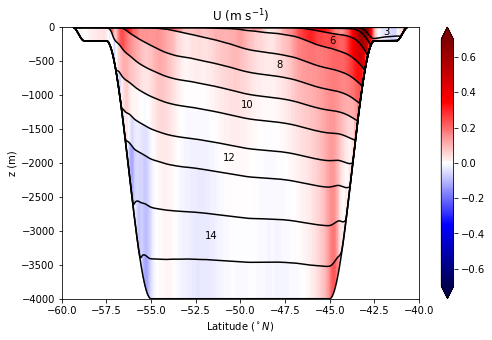

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
plt.pcolormesh( M32.yq[:-1], numpy.nan_to_num( e32.values ), U32[:,:-1], cmap=plt.cm.seismic, vmin=-.7, vmax=0.7 );
plt.xlim(-60,-40);
plt.colorbar(extend='both');
for e in e32:
    e.plot(color='k')
xoff = {2:-42,5:-45,7:-48,9:-50,11:-51,13:-52}
for k,x in xoff.items():
    plt.text( x, e32.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center')
plt.xlabel('Latitude (${^\circ}N$)'); plt.ylabel('z (m)'); plt.title('U (m s$^{-1}$)'); plt.xlim(-60,-40); plt.ylim(-4001,3);

In [16]:
G4 = xarray.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/ocean_geometry.nc', decode_times=False)

In [17]:
# mh4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/averages_00031502.nc', decode_times=False)
# h4 = mh4.h.isel(xh=0).mean(dim='time').compute()

In [18]:
UH4 = M4.uh.isel(xq=0,time=slice(-10,-1)).mean(dim='time').compute()
H4 = M4.h.isel(xh=0,time=slice(-10,-1)).mean(dim='time').compute()

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [19]:
U4 = UH4 / ( H4 * G4.dyCu[:,0].values )

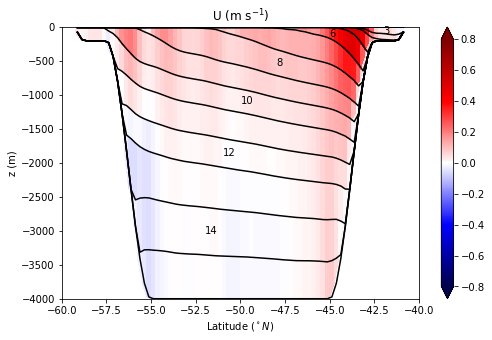

In [20]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
plt.pcolormesh( M4.yq[:-1], numpy.nan_to_num( e4.values ), U4[:,:-1], cmap=plt.cm.seismic, vmin=-.8, vmax=0.8 );
plt.xlim(-60,-40);
plt.colorbar(extend='both');
for e in e4:
    e.plot(color='k')
for k,x in xoff.items():
    plt.text( x, e4.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center')
plt.xlabel('Latitude (${^\circ}N$)'); plt.ylabel('z (m)'); plt.title('U (m s$^{-1}$)'); plt.xlim(-60,-40); plt.ylim(-4001,3);

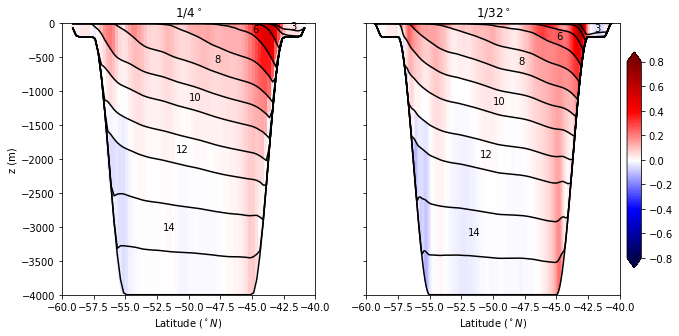

In [40]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
xoff = {2:-42,5:-45,7:-48,9:-50,11:-51,13:-52}
ax[0].pcolormesh( M4.yq[:-1], numpy.nan_to_num( e4.values ), U4[:,:-1], cmap=plt.cm.seismic, vmin=-.8, vmax=0.8 );
# plt.colorbar(extend='both');
for e in e4:
    e.plot(ax=ax[0], color='k')
ax[0].set_xlabel('Latitude (${^\circ}N$)'); ax[0].set_ylabel('z (m)'); ax[0].set_title('1/4$^\circ$'); ax[0].set_xlim(-60,-40); ax[0].set_ylim(-4001,3);
for k,x in xoff.items():
    ax[0].text( x, e4.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center')
pcm = ax[1].pcolormesh( M32.yq[:-1], numpy.nan_to_num( e32.values ), U32[:,:-1], cmap=plt.cm.seismic, vmin=-.8, vmax=0.8 );
# plt.colorbar(extend='both');
for e in e32:
    e.plot(ax=ax[1], color='k')
ax[1].set_xlabel('Latitude (${^\circ}N$)'); ax[1].set_title('1/32$^\circ$'); ax[1].set_xlim(-60,-40); ax[1].set_ylim(-4001,3);
ax[1].set(yticklabels=[],ylabel=None);
for k,x in xoff.items():
    ax[1].text( x, e32.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center')
cb = plt.colorbar(pcm, plt.axes([.91,.2,.02,.6]), extend='both');

CI = 0.048484848484848485


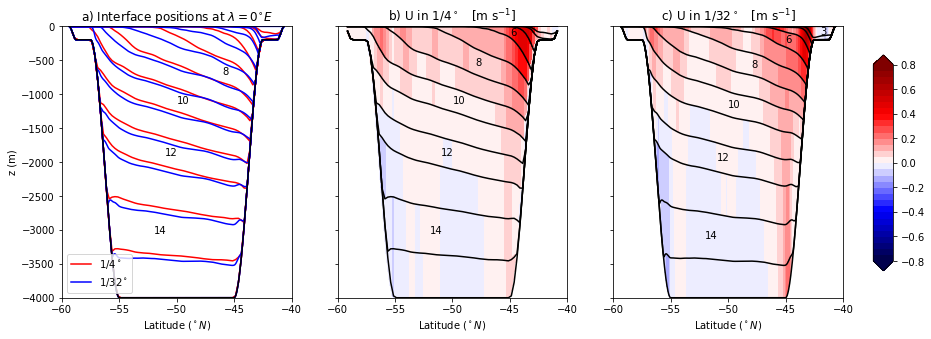

In [33]:
fig, axes = plt.subplots(1,3,figsize=(14,5))

nc = 33
ci = 1.6/nc
coff = 0*ci/2
print('CI =', ci)
norm = matplotlib.colors.BoundaryNorm(numpy.linspace(-.8-coff,.8+coff,nc), ncolors=plt.cm.seismic.N, clip=True)

ax = axes[0]
xoff = {7:-46,9:-50,11:-51,13:-52}
e4[-1].plot(ax=ax, color='r', label='1/4$^\circ$')
e32[-1].plot(ax=ax, color='b', label='1/32$^\circ$')
for e in e4:
    e.plot(ax=ax, color='r')
for e in e32:
    e.plot(ax=ax, color='b')
e32[-1].plot(ax=ax, color='k')
for k,x in xoff.items():
    ax.text( x, e4.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center')
ax.set_xlabel('Latitude (${^\circ}N$)'); ax.set_ylabel('z (m)'); ax.set_title('a) Interface positions at $\lambda = 0^{\circ}E$'); ax.set_xlim(-60,-40); ax.set_ylim(-4001,3);
ax.legend();

ax = axes[1]
xoff = {5:-45,7:-48,9:-50,11:-51,13:-52}
ax.pcolormesh( M4.yq[:-1], numpy.nan_to_num( e4.values ), U4[:,:-1], cmap=plt.cm.seismic, norm=norm );
# plt.colorbar(extend='both');
for e in e4:
    e.plot(ax=ax, color='k')
ax.set_xlabel('Latitude (${^\circ}N$)'); ax.set_ylabel('z (m)'); ax.set_title('b) U in 1/4$^\circ$   [m s$^{-1}$]'); ax.set_xlim(-60,-40); ax.set_ylim(-4001,3);
ax.set(yticklabels=[],ylabel=None);
for k,x in xoff.items():
    ax.text( x, e4.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center')

ax = axes[2]
xoff = {2:-42,5:-45,7:-48,9:-50,11:-51,13:-52}
pcm = ax.pcolormesh( M32.yq[:-1], numpy.nan_to_num( e32.values ), U32[:,:-1], cmap=plt.cm.seismic, norm=norm );
# plt.colorbar(extend='both');
for e in e32:
    e.plot(ax=ax, color='k')
ax.set_xlabel('Latitude (${^\circ}N$)'); ax.set_title('c) U in 1/32$^\circ$   [m s$^{-1}$]'); ax.set_xlim(-60,-40); ax.set_ylim(-4001,3);
ax.set(yticklabels=[],ylabel=None);
for k,x in xoff.items():
    ax.text( x, e32.sel(yh=x,method='nearest')[k:k+2].mean(), '%i'%(k+1), verticalalignment='center')

cb = plt.colorbar(pcm, plt.axes([.93,.2,.02,.6]), extend='both');
# cb.set_ticks(numpy.linspace(-.8,.8,9))
# cb = plt.colorbar(pcm, plt.axes([.57,.01,.22,.05]), orientation='horizontal', extend='both');
# plt.tight_layout();

plt.savefig('fig08-Drake-section.png')